In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('../data/sales_data.csv')

# Display basic information about the dataset
df.info()

# Display the first few rows of the dataset
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7375 entries, 0 to 7374
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   opportunity_id    7375 non-null   object 
 1   sales_agent       7375 non-null   object 
 2   product           7375 non-null   object 
 3   account           7375 non-null   object 
 4   deal_stage        7375 non-null   object 
 5   engage_date       7375 non-null   object 
 6   close_date        7375 non-null   object 
 7   close_value       7375 non-null   float64
 8   manager           7375 non-null   object 
 9   regional_office   7375 non-null   object 
 10  sector            7375 non-null   object 
 11  year_established  7375 non-null   int64  
 12  revenue           7375 non-null   float64
 13  employees         7375 non-null   float64
 14  office_location   7375 non-null   object 
 15  subsidiary_of     7375 non-null   object 
 16  series            7375 non-null   object 


,opportunity_id,sales_agent,product,account,deal_stage,engage_date,close_date,close_value,manager,regional_office,sector,year_established,revenue,employees,office_location,subsidiary_of,series,sales_price
0,ZNBS69V1,Anna Snelling,MG Special,Ron-tech,Won,2016-10-29,2017-03-01,49.0,Dustin Brinkmann,Central,medical,1992,3922.42,6837.0,United States,Independent,MG,55.0
1,NL3JZH1Z,Anna Snelling,MG Special,Bioholding,Won,2016-11-04,2017-03-10,53.0,Dustin Brinkmann,Central,medical,2012,587.34,1356.0,Philipines,Independent,MG,55.0
2,8SOQADK7,Anna Snelling,MG Special,Gogozoom,Lost,2016-11-14,2017-03-30,0.0,Dustin Brinkmann,Central,telecommunications,2007,86.68,187.0,United States,Sonron,MG,55.0
3,HEE6P0QH,Anna Snelling,MG Advanced,Statholdings,Won,2016-11-24,2017-03-25,3647.0,Dustin Brinkmann,Central,employment,1997,291.27,586.0,United States,Independent,MG,3393.0
4,TTA9LYBS,Anna Snelling,MG Special,Treequote,Won,2016-11-25,2017-03-01,58.0,Dustin Brinkmann,Central,telecommunications,1988,5266.09,8595.0,United States,Sonron,MG,55.0


In [2]:
# Summary statistics for numerical columns
df.describe()

# Summary statistics for categorical columns
df.describe(include='object')

,opportunity_id,sales_agent,product,account,deal_stage,engage_date,close_date,manager,regional_office,sector,office_location,subsidiary_of,series
count,7375,7375,7375,7375,7375,7375,7375,7375,7375,7375,7375,7375,7375
unique,7375,30,7,85,4,420,306,6,3,10,15,8,4
top,WL31FAI3,Darcel Schlecht,GTX Basic,Hottechi,Won,2017-12-19,2017-12-28,Melvin Marxen,Central,retail,United States,Independent,GTX
freq,1,613,1563,200,4238,54,76,1590,2901,1397,6120,6083,3545


In [3]:
# Check for missing values
df.isnull().sum()

opportunity_id      0
sales_agent         0
product             0
account             0
deal_stage          0
engage_date         0
close_date          0
close_value         0
manager             0
regional_office     0
sector              0
year_established    0
revenue             0
employees           0
office_location     0
subsidiary_of       0
series              0
sales_price         0
dtype: int64

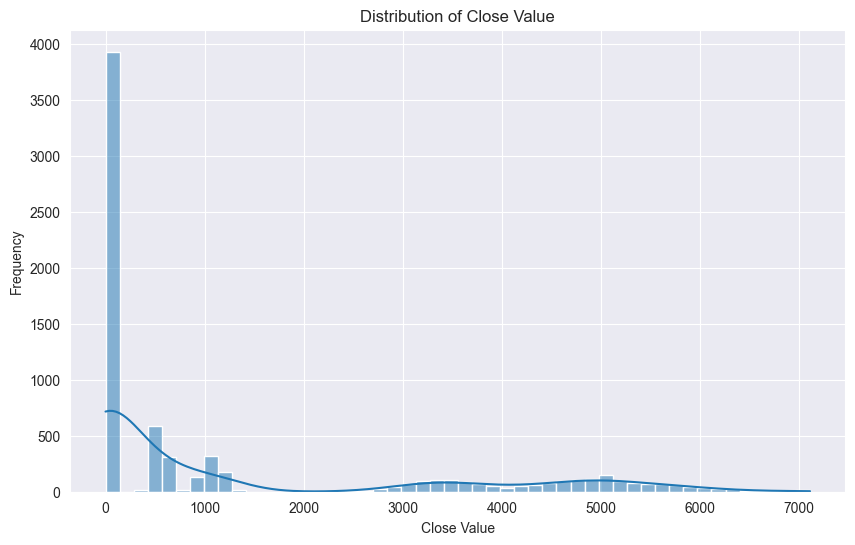

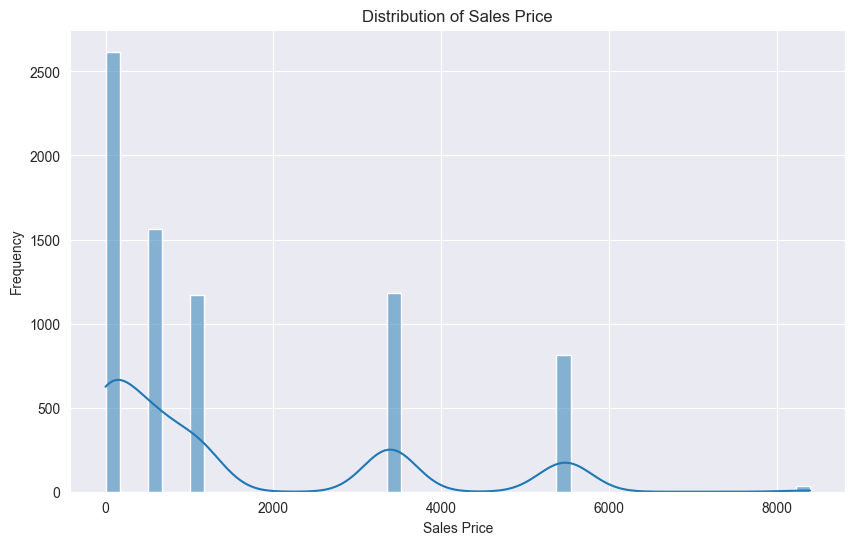

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of 'close_value'
plt.figure(figsize=(10, 6))
sns.histplot(df['close_value'], bins=50, kde=True)
plt.title('Distribution of Close Value')
plt.xlabel('Close Value')
plt.ylabel('Frequency')
plt.show()

# Distribution of 'sales_price'
plt.figure(figsize=(10, 6))
sns.histplot(df['sales_price'], bins=50, kde=True)
plt.title('Distribution of Sales Price')
plt.xlabel('Sales Price')
plt.ylabel('Frequency')
plt.show()

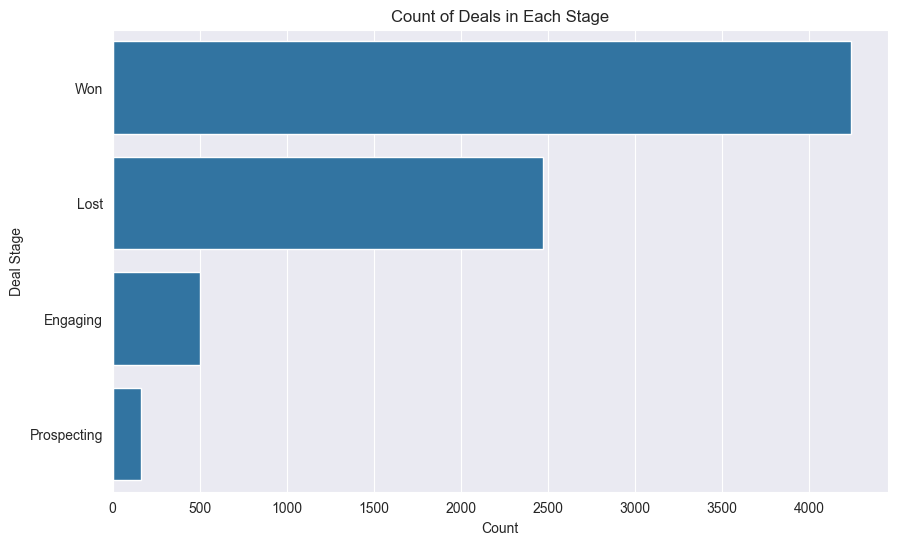

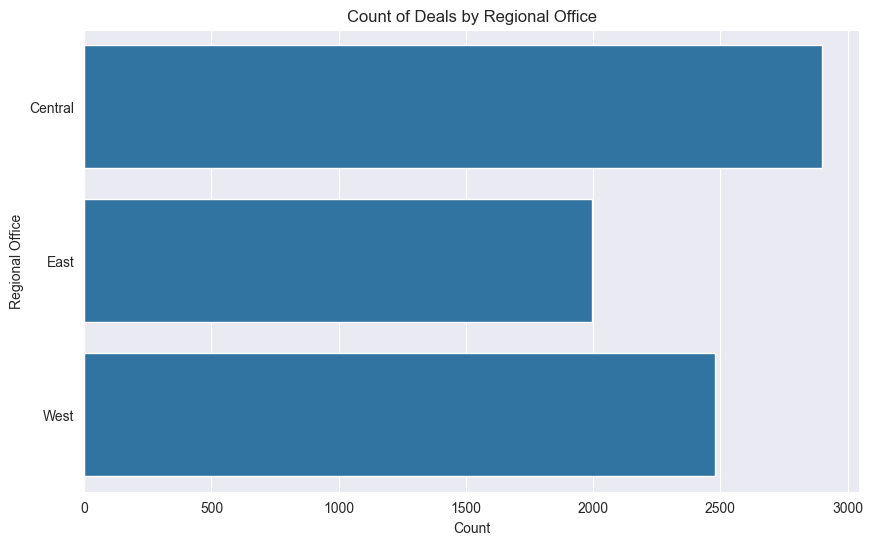

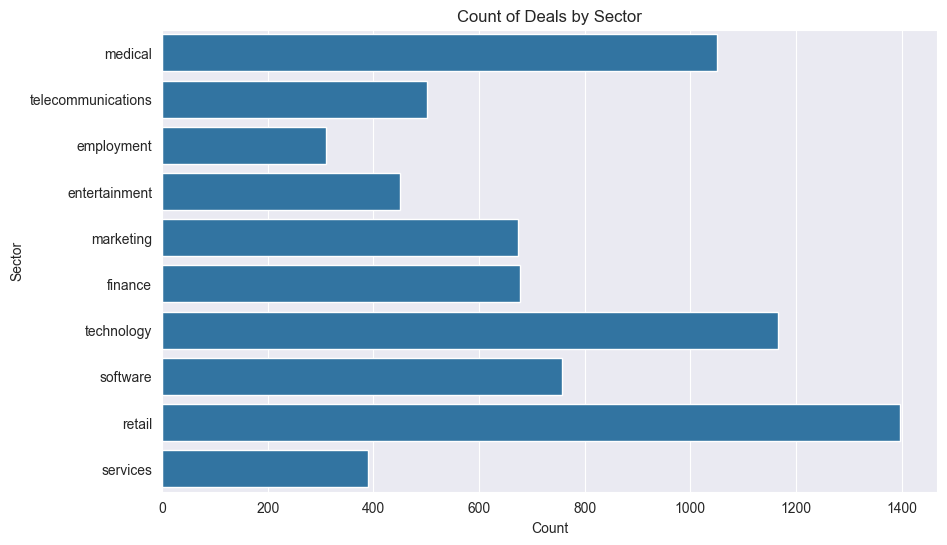

In [5]:
# Count plot for 'deal_stage'
plt.figure(figsize=(10, 6))
sns.countplot(y='deal_stage', data=df)
plt.title('Count of Deals in Each Stage')
plt.xlabel('Count')
plt.ylabel('Deal Stage')
plt.show()

# Count plot for 'regional_office'
plt.figure(figsize=(10, 6))
sns.countplot(y='regional_office', data=df)
plt.title('Count of Deals by Regional Office')
plt.xlabel('Count')
plt.ylabel('Regional Office')
plt.show()

# Count plot for 'sector'
plt.figure(figsize=(10, 6))
sns.countplot(y='sector', data=df)
plt.title('Count of Deals by Sector')
plt.xlabel('Count')
plt.ylabel('Sector')
plt.show()

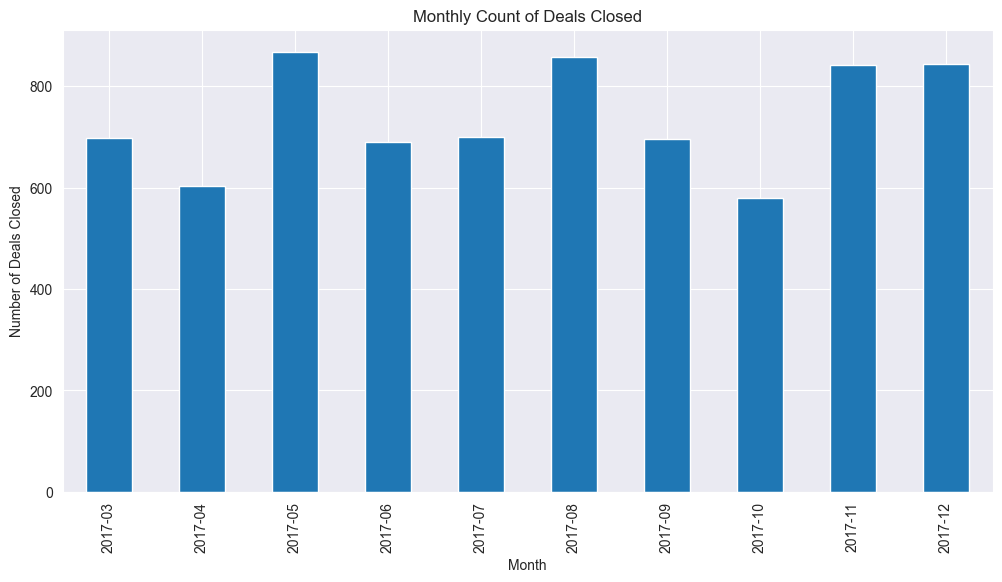

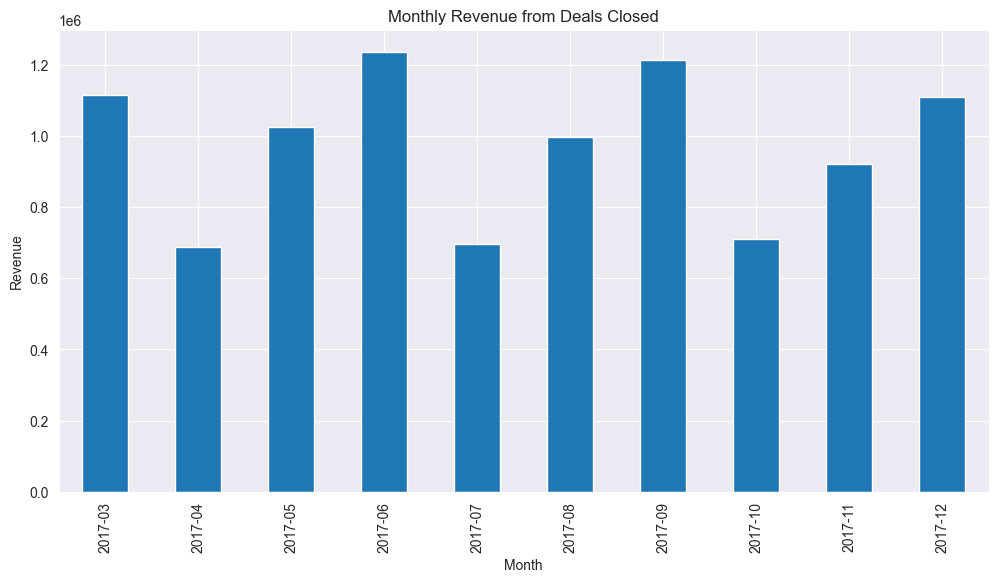

In [6]:
# Convert date columns to datetime
df['engage_date'] = pd.to_datetime(df['engage_date'])
df['close_date'] = pd.to_datetime(df['close_date'])

# Monthly count of deals closed
df['close_month'] = df['close_date'].dt.to_period('M')
monthly_deals = df.groupby('close_month').size()

plt.figure(figsize=(12, 6))
monthly_deals.plot(kind='bar')
plt.title('Monthly Count of Deals Closed')
plt.xlabel('Month')
plt.ylabel('Number of Deals Closed')
plt.show()

# Monthly revenue from deals closed
monthly_revenue = df.groupby('close_month')['close_value'].sum()

plt.figure(figsize=(12, 6))
monthly_revenue.plot(kind='bar')
plt.title('Monthly Revenue from Deals Closed')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()

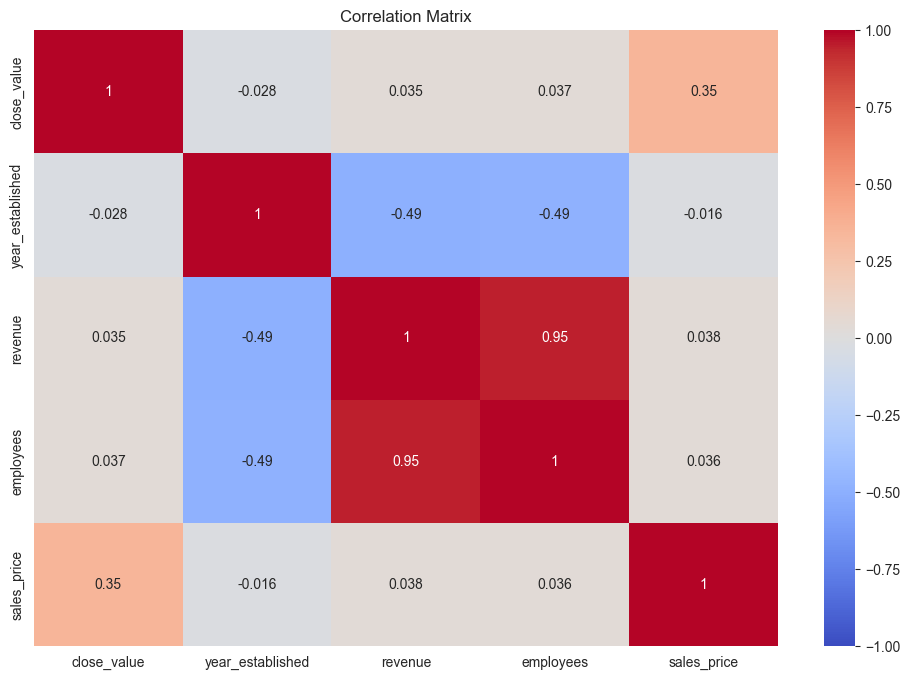

In [8]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr_matrix = numeric_cols.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()